# Testing NLP Tagging Tasks with SpaCy

- Sentence recognition
- Part of Speech Tagging
- Entity Recognition

In [1]:
from nltk.tokenize import sent_tokenize
import pandas as pd
import spacy

text_df = pd.read_pickle("../data/all_text.pkl")

In [2]:
# Using the medium sized model.

nlp = spacy.load("en_core_web_md")

In [3]:
demo_doc = text_df.iloc[4]["text_cleaned_nlp"]
demo_sentences = sent_tokenize(demo_doc)

In [4]:
demo_sentences

['THE HEALTH REFORMER Editorial.',
 'To the Reader.',
 'BY H. S. LAY M.D.',
 'In coming for the first time before the public as an editor of a Health Reform Journal it may be expected that we say a word to our readers in reference to what we intend to do and what we design shall be the style and character of the periodical of which we have been placed in charge.',
 'Knowing something of the great responsibilities that will be thrown upon us by this new position it would be with some misgivings that we engage in this enterprise were it not for our ardent desire to do all that lies in our power to instruct and benefit the people in relation to the right method of living and if we do not also expect the hearty co operation of those who have the health and well being of the people at heart.',
 'It shall be our great object to lay before our readers the facts of vital importance in relation to the health reform and aim to instruct the people how to avoid sickness or if sick how to regain th

In [5]:
text_df["sentences"] = text_df.text_cleaned_nlp.apply(lambda x: sent_tokenize(x))
text_df

,doc_id,text,type,text_cleaned,text_cleaned_sent,text_cleaned_nlp,sentences
0,HR18660801-V01-01-p8.txt-auto_corrected,""" "" O\nC\n'l'HE HEALTH REFORMER. : ,. r c ,;...",auto_corrected,c l he health reformer r c cy ...,c l he health reformer. . r c cy ...,O C l HE HEALTH REFORMER. . r c CY c c x . x x...,"[O C l HE HEALTH REFORMER., ., r c CY c c x .,..."
1,YI18540801-V02-08-p4.txt-auto_corrected,",man , III z onnasalpm twzI 11 11 11 1, 'IAA U...",auto_corrected,man iii z onnasalpm twzi iaa u...,man iii z onnasalpm twzi iaa u...,man III z onnasalpm twzI IAA UM I II . KJ . . ...,"[man III z onnasalpm twzI IAA UM I II ., KJ .,..."
2,ST18740813-V01-06-p1.txt-auto_corrected,kr ffiigno the Zintro IS ISSUED WEEKLY AT OAKL...,auto_corrected,kr ffiigno zintro issued weekly oakland calif...,kr ffiigno zintro issued weekly oakland calif...,kr ffiigno the Zintro IS ISSUED WEEKLY AT OAKL...,[kr ffiigno the Zintro IS ISSUED WEEKLY AT OAK...
3,RH18540815-V06-01-p1.txt-auto_corrected,THE REVIEW AND HERALD. IS PUBLISHED WEEKLY At ...,auto_corrected,review herald published weekly south st paul...,review herald. published weekly south st. paul...,THE REVIEW AND HERALD. IS PUBLISHED WEEKLY At ...,"[THE REVIEW AND HERALD., IS PUBLISHED WEEKLY A..."
4,HR18660801-V01-01-p8.txt-ground_truth,8 THE HEALTH REFORMER\n\nEditorial.\n\nTo ...,ground_truth,health reformer editorial reader h s lay...,health reformer editorial. reader. h. s. lay...,THE HEALTH REFORMER Editorial. To the Reader. ...,"[THE HEALTH REFORMER Editorial., To the Reader..."
5,YI18540801-V02-08-p4.txt-ground_truth,60 YOUTH'S INSTRUCTOR. \n\nhumble man Davi...,ground_truth,youth s instructor humble man david was a...,youth s instructor. humble man david was. a...,YOUTH S INSTRUCTOR. humble man David was. Alth...,"[YOUTH S INSTRUCTOR., humble man David was., A..."
6,ST18740813-V01-06-p1.txt-ground_truth,"The Signs of the Times.\n""Behold, I come quick...",ground_truth,signs times behold come quickly reward me ...,signs times. behold come quickly reward me ...,The Signs of the Times. Behold I come quickly ...,"[The Signs of the Times., Behold I come quickl..."
7,RH18540815-V06-01-p1.txt-ground_truth,"THE ADVENT REVIEW, \nAND SABBATH HERALD.\n\nHe...",ground_truth,advent review sabbath herald patience saints...,advent review sabbath herald. patience saints...,THE ADVENT REVIEW AND SABBATH HERALD. Here is ...,"[THE ADVENT REVIEW AND SABBATH HERALD., Here i..."


## Tagging by Sentence

In [6]:
nouns = []
verbs = []
adv_adj = []
entities = []

for sent in demo_sentences:
    doc = nlp(sent)
    # nouns, verbs, entities with entity label 
    nouns.append([(token, token.pos_) for token in doc if token.pos_ == "NOUN" or token.pos_ == "PROPN"])
    verbs.append([(token, token.pos_) for token in doc if token.pos_ == "VERB"])
    adv_adj.append([(token, token.pos_) for token in doc if token.pos_ == "ADJ" or token.pos_ == "ADV"])
    entities.append([(ent.text, ent.label_) for ent in doc.ents])

print(adv_adj)
print(entities)
        

[[], [], [], [(first, 'ADJ')], [(great, 'ADJ'), (new, 'ADJ'), (ardent, 'ADJ'), (right, 'ADJ'), (also, 'ADV'), (hearty, 'ADJ'), (well, 'ADV')], [(great, 'ADJ'), (vital, 'ADJ'), (how, 'ADV'), (sick, 'ADJ'), (how, 'ADV')], [(constant, 'ADJ'), (worthy, 'ADJ'), (intelligent, 'ADJ'), (candid, 'ADJ')], [(high, 'ADJ'), (mental, 'ADJ'), (moral, 'ADJ')], [(choicest, 'ADJ')], [(also, 'ADV'), (limited, 'ADJ'), (relative, 'ADJ'), (worth, 'ADJ'), (more, 'ADJ')], [(only, 'ADV'), (high, 'ADJ'), (nicest, 'ADJ')], [(first, 'ADJ'), (good, 'ADJ'), (intelligent, 'ADJ')], [(now, 'ADV')], [(better, 'ADJ'), (better, 'ADV')], [(faithfully, 'ADV'), (strict, 'ADJ'), (intelligent, 'ADJ')], [(denominational, 'ADJ')], [(equally, 'ADV'), (interested, 'ADJ')], [(therefore, 'ADV'), (proper, 'ADJ'), (religious, 'ADJ'), (moral, 'ADJ'), (denominational, 'ADJ')], [(all, 'ADV'), (therefore, 'ADV'), (introductory, 'ADJ'), (friendly, 'ADJ'), (healthful, 'ADJ')], [], [], [], [(highest, 'ADJ'), (present, 'ADJ')], [(Hence, 'ADV

In [7]:
def parse_document(sentences_list):
    tagged_sents = []
    entities = []

    for sent in sentences_list:
        doc = nlp(sent)
        # nouns, verbs, entities with entity label
        tagged_sents.append([(token.orth_, token.pos_) for token in doc])
        entities.append([(ent.text, ent.label_) for ent in doc.ents])
        
    return tagged_sents, entities

In [8]:
nlp_df = pd.DataFrame(text_df.sentences.apply(lambda x: parse_document(x)))

In [9]:
nlp_df

,sentences
0,"([[('O', 'INTJ'), ('C', 'NOUN'), ('l', 'NOUN')..."
1,"([[('man', 'PROPN'), ('III', 'CCONJ'), ('z', '..."
2,"([[('kr', 'PROPN'), ('ffiigno', 'VERB'), ('the..."
3,"([[('THE', 'DET'), ('REVIEW', 'PROPN'), ('AND'..."
4,"([[('THE', 'DET'), ('HEALTH', 'NOUN'), ('REFOR..."
5,"([[('YOUTH', 'PROPN'), ('S', 'PROPN'), ('INSTR..."
6,"([[('The', 'DET'), ('Signs', 'NOUN'), ('of', '..."
7,"([[('THE', 'DET'), ('ADVENT', 'PROPN'), ('REVI..."


In [10]:
nlp_df[['tagged_sents', 'entities']] = pd.DataFrame(nlp_df.sentences.tolist(), index= nlp_df.index)

In [11]:
nlp_df

,sentences,tagged_sents,entities
0,"([[('O', 'INTJ'), ('C', 'NOUN'), ('l', 'NOUN')...","[[(O, INTJ), (C, NOUN), (l, NOUN), (HE, PROPN)...","[[], [], [], [], [(tl l t, ORG)], [(l n l, ORG..."
1,"([[('man', 'PROPN'), ('III', 'CCONJ'), ('z', '...","[[(man, PROPN), (III, CCONJ), (z, NOUN), (onna...","[[(IAA UM I II, ORG)], [], [], [], [(David, PE..."
2,"([[('kr', 'PROPN'), ('ffiigno', 'VERB'), ('the...","[[(kr, PROPN), (ffiigno, VERB), (the, DET), (Z...","[[(kr, GPE), (ffiigno the Zintro IS ISSUED WEE..."
3,"([[('THE', 'DET'), ('REVIEW', 'PROPN'), ('AND'...","[[(THE, DET), (REVIEW, PROPN), (AND, CCONJ), (...","[[], [(WEEKLY, DATE), (South St. Paul st., FAC..."
4,"([[('THE', 'DET'), ('HEALTH', 'NOUN'), ('REFOR...","[[(THE, DET), (HEALTH, NOUN), (REFORMER, PROPN...","[[], [], [(H. S., PERSON), (M.D., GPE)], [(fir..."
5,"([[('YOUTH', 'PROPN'), ('S', 'PROPN'), ('INSTR...","[[(YOUTH, PROPN), (S, PROPN), (INSTRUCTOR, NOU...","[[], [(David, PERSON)], [], [(David, PERSON)],..."
6,"([[('The', 'DET'), ('Signs', 'NOUN'), ('of', '...","[[(The, DET), (Signs, NOUN), (of, ADP), (the, ...","[[(Times, ORG)], [], [], [(XXII Volume OAKLAND..."
7,"([[('THE', 'DET'), ('ADVENT', 'PROPN'), ('REVI...","[[(THE, DET), (ADVENT, PROPN), (REVIEW, PROPN)...","[[(THE ADVENT REVIEW, ORG)], [], [], [(VI, ORG..."


In [12]:
nlp_df = nlp_df.drop(columns=['sentences'])

In [13]:
text_df = pd.concat([text_df, nlp_df], axis=1)
text_df

,doc_id,text,type,text_cleaned,text_cleaned_sent,text_cleaned_nlp,sentences,tagged_sents,entities
0,HR18660801-V01-01-p8.txt-auto_corrected,""" "" O\nC\n'l'HE HEALTH REFORMER. : ,. r c ,;...",auto_corrected,c l he health reformer r c cy ...,c l he health reformer. . r c cy ...,O C l HE HEALTH REFORMER. . r c CY c c x . x x...,"[O C l HE HEALTH REFORMER., ., r c CY c c x .,...","[[(O, INTJ), (C, NOUN), (l, NOUN), (HE, PROPN)...","[[], [], [], [], [(tl l t, ORG)], [(l n l, ORG..."
1,YI18540801-V02-08-p4.txt-auto_corrected,",man , III z onnasalpm twzI 11 11 11 1, 'IAA U...",auto_corrected,man iii z onnasalpm twzi iaa u...,man iii z onnasalpm twzi iaa u...,man III z onnasalpm twzI IAA UM I II . KJ . . ...,"[man III z onnasalpm twzI IAA UM I II ., KJ .,...","[[(man, PROPN), (III, CCONJ), (z, NOUN), (onna...","[[(IAA UM I II, ORG)], [], [], [], [(David, PE..."
2,ST18740813-V01-06-p1.txt-auto_corrected,kr ffiigno the Zintro IS ISSUED WEEKLY AT OAKL...,auto_corrected,kr ffiigno zintro issued weekly oakland calif...,kr ffiigno zintro issued weekly oakland calif...,kr ffiigno the Zintro IS ISSUED WEEKLY AT OAKL...,[kr ffiigno the Zintro IS ISSUED WEEKLY AT OAK...,"[[(kr, PROPN), (ffiigno, VERB), (the, DET), (Z...","[[(kr, GPE), (ffiigno the Zintro IS ISSUED WEE..."
3,RH18540815-V06-01-p1.txt-auto_corrected,THE REVIEW AND HERALD. IS PUBLISHED WEEKLY At ...,auto_corrected,review herald published weekly south st paul...,review herald. published weekly south st. paul...,THE REVIEW AND HERALD. IS PUBLISHED WEEKLY At ...,"[THE REVIEW AND HERALD., IS PUBLISHED WEEKLY A...","[[(THE, DET), (REVIEW, PROPN), (AND, CCONJ), (...","[[], [(WEEKLY, DATE), (South St. Paul st., FAC..."
4,HR18660801-V01-01-p8.txt-ground_truth,8 THE HEALTH REFORMER\n\nEditorial.\n\nTo ...,ground_truth,health reformer editorial reader h s lay...,health reformer editorial. reader. h. s. lay...,THE HEALTH REFORMER Editorial. To the Reader. ...,"[THE HEALTH REFORMER Editorial., To the Reader...","[[(THE, DET), (HEALTH, NOUN), (REFORMER, PROPN...","[[], [], [(H. S., PERSON), (M.D., GPE)], [(fir..."
5,YI18540801-V02-08-p4.txt-ground_truth,60 YOUTH'S INSTRUCTOR. \n\nhumble man Davi...,ground_truth,youth s instructor humble man david was a...,youth s instructor. humble man david was. a...,YOUTH S INSTRUCTOR. humble man David was. Alth...,"[YOUTH S INSTRUCTOR., humble man David was., A...","[[(YOUTH, PROPN), (S, PROPN), (INSTRUCTOR, NOU...","[[], [(David, PERSON)], [], [(David, PERSON)],..."
6,ST18740813-V01-06-p1.txt-ground_truth,"The Signs of the Times.\n""Behold, I come quick...",ground_truth,signs times behold come quickly reward me ...,signs times. behold come quickly reward me ...,The Signs of the Times. Behold I come quickly ...,"[The Signs of the Times., Behold I come quickl...","[[(The, DET), (Signs, NOUN), (of, ADP), (the, ...","[[(Times, ORG)], [], [], [(XXII Volume OAKLAND..."
7,RH18540815-V06-01-p1.txt-ground_truth,"THE ADVENT REVIEW, \nAND SABBATH HERALD.\n\nHe...",ground_truth,advent review sabbath herald patience saints...,advent review sabbath herald. patience saints...,THE ADVENT REVIEW AND SABBATH HERALD. Here is ...,"[THE ADVENT REVIEW AND SABBATH HERALD., Here i...","[[(THE, DET), (ADVENT, PROPN), (REVIEW, PROPN)...","[[(THE ADVENT REVIEW, ORG)], [], [], [(VI, ORG..."


In [14]:
# Create Sentences Dataframe

from nltk.tokenize import word_tokenize


def split_df(df, columns_to_drop, column_to_split):
    
    small_df = df.drop(columns=columns_to_drop)
    split_df = small_df.explode(column_to_split).reset_index()
    
    return split_df


In [15]:
sent_df = split_df(text_df,
                  ['text', 'text_cleaned', 'text_cleaned_sent', 'text_cleaned_nlp', 'tagged_sents', 'entities'],
                  'sentences')

sent_df['sent_length'] = sent_df.sentences.apply(lambda x: len(word_tokenize(x)))
sent_df

,index,doc_id,type,sentences,sent_length
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,O C l HE HEALTH REFORMER.,7
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,.,1
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,r c CY c c x .,7
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,x x o I Sickness has come to be the ruling con !!,14
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,tl l t .,4
...,...,...,...,...,...
865,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,For verily I say unto you Till heaven and eart...,29
866,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,What is a jot and a tittle?,8
867,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,A jot is the smallest letter of the Hebrew alp...,11
868,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,A tittle is a small point by which some of tho...,17


In [16]:
sent_df.to_pickle("../data/sentences.pkl")

In [17]:
# Create Word DF
word_df = split_df(text_df,
                  ['text', 'text_cleaned', 'text_cleaned_sent', 'text_cleaned_nlp', 'sentences', 'entities'],
                  'tagged_sents')

In [18]:
word_df['sent_number'] = word_df.groupby(['doc_id'])['tagged_sents'].cumcount()+1
word_df

,index,doc_id,type,tagged_sents,sent_number
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(O, INTJ), (C, NOUN), (l, NOUN), (HE, PROPN),...",1
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(., PUNCT)]",2
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(r, X), (c, X), (CY, PROPN), (c, AUX), (c, NO...",3
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(x, X), (x, PUNCT), (o, INTJ), (I, PRON), (Si...",4
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(tl, PROPN), (l, NOUN), (t, PROPN), (., PUNCT)]",5
...,...,...,...,...,...
865,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"[(For, ADP), (verily, ADV), (I, PRON), (say, V...",149
866,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"[(What, PRON), (is, AUX), (a, DET), (jot, NOUN...",150
867,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"[(A, DET), (jot, NOUN), (is, AUX), (the, DET),...",151
868,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"[(A, DET), (tittle, NOUN), (is, AUX), (a, DET)...",152


In [19]:
word_df = word_df.explode('tagged_sents').reset_index(drop=True)
word_df

,index,doc_id,type,tagged_sents,sent_number
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(O, INTJ)",1
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(C, NOUN)",1
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(l, NOUN)",1
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HE, PROPN)",1
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HEALTH, NOUN)",1
...,...,...,...,...,...
14144,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(others, NOUN)",152
14145,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(., PUNCT)",152
14146,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Our, PRON)",153
14147,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Lord, PROPN)",153


In [20]:
# df[['b1', 'b2']] = pd.DataFrame(df['b'].tolist(), index=df.index) 
# https://stackoverflow.com/questions/29550414/how-can-i-split-a-column-of-tuples-in-a-pandas-dataframe

word_df[['token', 'tag']] = pd.DataFrame(word_df['tagged_sents'].to_list(), index=word_df.index)

In [21]:
word_df

,index,doc_id,type,tagged_sents,sent_number,token,tag
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(O, INTJ)",1,O,INTJ
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(C, NOUN)",1,C,NOUN
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(l, NOUN)",1,l,NOUN
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HE, PROPN)",1,HE,PROPN
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HEALTH, NOUN)",1,HEALTH,NOUN
...,...,...,...,...,...,...,...
14144,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(others, NOUN)",152,others,NOUN
14145,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(., PUNCT)",152,.,PUNCT
14146,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Our, PRON)",153,Our,PRON
14147,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Lord, PROPN)",153,Lord,PROPN


In [22]:
word_df['token_length'] = word_df['token'].str.len()
word_df

,index,doc_id,type,tagged_sents,sent_number,token,tag,token_length
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(O, INTJ)",1,O,INTJ,1
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(C, NOUN)",1,C,NOUN,1
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(l, NOUN)",1,l,NOUN,1
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HE, PROPN)",1,HE,PROPN,2
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HEALTH, NOUN)",1,HEALTH,NOUN,6
...,...,...,...,...,...,...,...,...
14144,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(others, NOUN)",152,others,NOUN,6
14145,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(., PUNCT)",152,.,PUNCT,1
14146,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Our, PRON)",153,Our,PRON,3
14147,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Lord, PROPN)",153,Lord,PROPN,4


In [23]:
word_df.to_pickle("../data/words.pkl")

In [24]:
# Entities DF

ent_df = split_df(text_df,
                  ['text', 'text_cleaned', 'text_cleaned_sent', 'text_cleaned_nlp', 'tagged_sents', 'sentences'],
                  'entities'
                 )
ent_df        

,index,doc_id,type,entities
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[]
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[]
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[]
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[]
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(tl l t, ORG)]"
...,...,...,...,...
865,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,[]
866,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,[]
867,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"[(Hebrew, LANGUAGE)]"
868,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,[]


In [25]:
ent_df['sent_number'] = ent_df.groupby(['doc_id'])['entities'].cumcount()+1
ent_df

,index,doc_id,type,entities,sent_number
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[],1
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[],2
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[],3
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,[],4
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"[(tl l t, ORG)]",5
...,...,...,...,...,...
865,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,[],149
866,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,[],150
867,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"[(Hebrew, LANGUAGE)]",151
868,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,[],152


In [26]:
ent_df = ent_df.explode('entities').reset_index()
# replace NaN values with an empty tuple
ent_df['entities'] = ent_df['entities'].fillna({i: () for i in ent_df.index})
ent_df

,level_0,index,doc_id,type,entities,sent_number
0,0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),1
1,1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),2
2,2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),3
3,3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),4
4,4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(tl l t, ORG)",5
...,...,...,...,...,...,...
981,865,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,(),149
982,866,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,(),150
983,867,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Hebrew, LANGUAGE)",151
984,868,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,(),152


In [27]:
ent_df[['token', 'tag']] = pd.DataFrame(ent_df['entities'].to_list(), index=ent_df.index)
ent_df

,level_0,index,doc_id,type,entities,sent_number,token,tag
0,0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),1,None,None
1,1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),2,None,None
2,2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),3,None,None
3,3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,(),4,None,None
4,4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(tl l t, ORG)",5,tl l t,ORG
...,...,...,...,...,...,...,...,...
981,865,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,(),149,None,None
982,866,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,(),150,None,None
983,867,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Hebrew, LANGUAGE)",151,Hebrew,LANGUAGE
984,868,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,(),152,None,None


In [28]:
ent_df.to_pickle("../data/entities.pkl")

## Comparisons

### Sentences

First, comparing how well sentence recognition worked between the OCRed and ground truth texts. 

In [29]:
# group by 'doc_id', get count of sentences, compute statistics on 'sent_length'

In [30]:
sent_df.groupby(['doc_id'])['sent_length'].describe()

,count,mean,std,min,25%,50%,75%,max
doc_id,,,,,,,,
HR18660801-V01-01-p8.txt-auto_corrected,57.0,16.228070,15.066540,1.0,5.0,14.0,22.0,81.0
HR18660801-V01-01-p8.txt-ground_truth,35.0,21.914286,19.901776,2.0,6.0,15.0,34.0,83.0
RH18540815-V06-01-p1.txt-auto_corrected,152.0,14.197368,12.445930,1.0,4.0,11.5,20.0,62.0
RH18540815-V06-01-p1.txt-ground_truth,153.0,13.954248,12.234195,1.0,4.0,11.0,20.0,62.0
ST18740813-V01-06-p1.txt-auto_corrected,163.0,18.987730,16.898750,1.0,5.0,14.0,29.0,108.0
ST18740813-V01-06-p1.txt-ground_truth,161.0,18.925466,14.915827,1.0,6.0,19.0,26.0,88.0
YI18540801-V02-08-p4.txt-auto_corrected,76.0,13.526316,10.934317,1.0,5.0,11.5,18.0,56.0
YI18540801-V02-08-p4.txt-ground_truth,73.0,13.698630,10.767344,2.0,5.0,12.0,18.0,55.0


doc_id
HR18660801-V01-01-p8.txt-auto_corrected    AxesSubplot(0.125,0.125;0.775x0.755)
HR18660801-V01-01-p8.txt-ground_truth      AxesSubplot(0.125,0.125;0.775x0.755)
RH18540815-V06-01-p1.txt-auto_corrected    AxesSubplot(0.125,0.125;0.775x0.755)
RH18540815-V06-01-p1.txt-ground_truth      AxesSubplot(0.125,0.125;0.775x0.755)
ST18740813-V01-06-p1.txt-auto_corrected    AxesSubplot(0.125,0.125;0.775x0.755)
ST18740813-V01-06-p1.txt-ground_truth      AxesSubplot(0.125,0.125;0.775x0.755)
YI18540801-V02-08-p4.txt-auto_corrected    AxesSubplot(0.125,0.125;0.775x0.755)
YI18540801-V02-08-p4.txt-ground_truth      AxesSubplot(0.125,0.125;0.775x0.755)
Name: sent_length, dtype: object

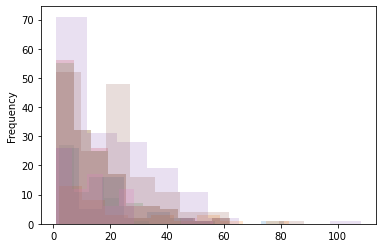

In [31]:
sent_df.groupby(['doc_id'])['sent_length'].plot.hist(alpha=0.2)

### Words

1. compare the number of tokens in each sentence (including spaces and punctuation )
2. compare the length of words (excluding punctuation and spaces)
3. compare number of space and punctuations

In [32]:
# Words per sentence

tokens = word_df.groupby(['doc_id', 'sent_number'])['token'].count().reset_index(name='token_count')
tokens

,doc_id,sent_number,token_count
0,HR18660801-V01-01-p8.txt-auto_corrected,1,7
1,HR18660801-V01-01-p8.txt-auto_corrected,2,1
2,HR18660801-V01-01-p8.txt-auto_corrected,3,7
3,HR18660801-V01-01-p8.txt-auto_corrected,4,14
4,HR18660801-V01-01-p8.txt-auto_corrected,5,4
...,...,...,...
865,YI18540801-V02-08-p4.txt-ground_truth,69,6
866,YI18540801-V02-08-p4.txt-ground_truth,70,7
867,YI18540801-V02-08-p4.txt-ground_truth,71,8
868,YI18540801-V02-08-p4.txt-ground_truth,72,7


In [33]:
tokens.groupby(['doc_id'])['token_count'].describe()

,count,mean,std,min,25%,50%,75%,max
doc_id,,,,,,,,
HR18660801-V01-01-p8.txt-auto_corrected,57.0,16.140351,14.942077,1.0,5.0,14.0,22.0,80.0
HR18660801-V01-01-p8.txt-ground_truth,35.0,21.885714,19.925998,2.0,5.5,15.0,34.0,83.0
RH18540815-V06-01-p1.txt-auto_corrected,152.0,14.197368,12.450718,1.0,4.0,11.5,20.0,62.0
RH18540815-V06-01-p1.txt-ground_truth,153.0,13.960784,12.233411,1.0,4.0,11.0,20.0,62.0
ST18740813-V01-06-p1.txt-auto_corrected,163.0,18.993865,16.899666,1.0,5.0,14.0,29.0,108.0
ST18740813-V01-06-p1.txt-ground_truth,161.0,18.925466,14.917084,1.0,6.0,19.0,26.0,88.0
YI18540801-V02-08-p4.txt-auto_corrected,76.0,13.513158,10.945311,1.0,5.0,11.5,18.0,56.0
YI18540801-V02-08-p4.txt-ground_truth,73.0,13.684932,10.781771,2.0,5.0,12.0,18.0,55.0


In [34]:
tags = pd.DataFrame(word_df.groupby(['doc_id', 'tag'])['tag'].count())

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tags)

                                               tag
doc_id                                  tag       
HR18660801-V01-01-p8.txt-auto_corrected ADJ     51
                                        ADP     75
                                        ADV     18
                                        AUX     42
                                        CCONJ   34
                                        DET     90
                                        INTJ    13
                                        NOUN   200
                                        NUM      1
                                        PART    29
                                        PRON    73
                                        PROPN  100
                                        PUNCT   62
                                        SCONJ    6
                                        VERB    99
                                        X       27
HR18660801-V01-01-p8.txt-ground_truth   ADJ     52
                               

In [35]:
# Compare length of words, excluding punctuation and spaces

# https://www.codegrepper.com/code-examples/python/pandas+drop+rows+with+value+in+list
# df = df[~df['date'].isin(a)]
filtered_words = word_df[~word_df['tag'].isin(['SPACE', 'PUNCT'])]
filtered_words

,index,doc_id,type,tagged_sents,sent_number,token,tag,token_length
0,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(O, INTJ)",1,O,INTJ,1
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(C, NOUN)",1,C,NOUN,1
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(l, NOUN)",1,l,NOUN,1
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HE, PROPN)",1,HE,PROPN,2
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HEALTH, NOUN)",1,HEALTH,NOUN,6
...,...,...,...,...,...,...,...,...
14143,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(from, ADP)",152,from,ADP,4
14144,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(others, NOUN)",152,others,NOUN,6
14146,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Our, PRON)",153,Our,PRON,3
14147,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Lord, PROPN)",153,Lord,PROPN,4


In [36]:
filtered_words.groupby(['doc_id'])['token_length'].describe()

,count,mean,std,min,25%,50%,75%,max
doc_id,,,,,,,,
HR18660801-V01-01-p8.txt-auto_corrected,858.0,3.623543,2.380248,1.0,2.0,3.0,5.0,14.0
HR18660801-V01-01-p8.txt-ground_truth,732.0,4.357923,2.510232,1.0,2.0,4.0,6.0,16.0
RH18540815-V06-01-p1.txt-auto_corrected,2006.0,4.178963,2.339166,1.0,3.0,3.0,5.0,15.0
RH18540815-V06-01-p1.txt-ground_truth,1983.0,4.228442,2.369023,1.0,3.0,3.0,5.0,14.0
ST18740813-V01-06-p1.txt-auto_corrected,2934.0,4.147580,2.166847,1.0,3.0,4.0,5.0,13.0
ST18740813-V01-06-p1.txt-ground_truth,2888.0,4.216066,2.241960,1.0,3.0,4.0,5.0,13.0
YI18540801-V02-08-p4.txt-auto_corrected,953.0,3.801679,1.930928,1.0,2.0,3.0,5.0,13.0
YI18540801-V02-08-p4.txt-ground_truth,927.0,3.883495,1.975393,1.0,2.0,3.0,5.0,13.0


In [37]:
# Compare spaces and punctuation
spaces = word_df[word_df['tag'].isin(['SPACE', 'PUNCT'])]
spaces

,index,doc_id,type,tagged_sents,sent_number,token,tag,token_length
6,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(., PUNCT)",1,.,PUNCT,1
7,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(., PUNCT)",2,.,PUNCT,1
14,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(., PUNCT)",3,.,PUNCT,1
16,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(x, PUNCT)",4,x,PUNCT,1
27,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(!, PUNCT)",4,!,PUNCT,1
...,...,...,...,...,...,...,...,...
14080,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(., PUNCT)",148,.,PUNCT,1
14109,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(., PUNCT)",149,.,PUNCT,1
14117,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(?, PUNCT)",150,?,PUNCT,1
14128,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(., PUNCT)",151,.,PUNCT,1


In [38]:
spaces.groupby(['doc_id'])['token_length'].describe()

,count,mean,std,min,25%,50%,75%,max
doc_id,,,,,,,,
HR18660801-V01-01-p8.txt-auto_corrected,62.0,1.112903,0.575592,1.0,1.0,1.0,1.0,5.0
HR18660801-V01-01-p8.txt-ground_truth,34.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
RH18540815-V06-01-p1.txt-auto_corrected,152.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
RH18540815-V06-01-p1.txt-ground_truth,153.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
ST18740813-V01-06-p1.txt-auto_corrected,162.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
ST18740813-V01-06-p1.txt-ground_truth,159.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
YI18540801-V02-08-p4.txt-auto_corrected,74.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
YI18540801-V02-08-p4.txt-ground_truth,72.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [39]:
spaces['token'].unique()

array(['.', 'x', '!', '.M.', '.w', '.Tour', '?'], dtype=object)

### Parts of Speech

Look at the nouns and verbs between the two documents.


In [40]:
nouns = word_df[word_df['tag'].isin(['NOUN', 'PROPN'])]
nouns

,index,doc_id,type,tagged_sents,sent_number,token,tag,token_length
1,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(C, NOUN)",1,C,NOUN,1
2,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(l, NOUN)",1,l,NOUN,1
3,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HE, PROPN)",1,HE,PROPN,2
4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(HEALTH, NOUN)",1,HEALTH,NOUN,6
5,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(REFORMER, PROPN)",1,REFORMER,PROPN,8
...,...,...,...,...,...,...,...,...
14130,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(tittle, NOUN)",152,tittle,NOUN,6
14134,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(point, NOUN)",152,point,NOUN,5
14140,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(letters, NOUN)",152,letters,NOUN,7
14144,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(others, NOUN)",152,others,NOUN,6


In [41]:
nouns.groupby(['doc_id'])['tag'].describe()

,count,unique,top,freq
doc_id,,,,
HR18660801-V01-01-p8.txt-auto_corrected,300,2,NOUN,200
HR18660801-V01-01-p8.txt-ground_truth,180,2,NOUN,154
RH18540815-V06-01-p1.txt-auto_corrected,554,2,NOUN,332
RH18540815-V06-01-p1.txt-ground_truth,516,2,NOUN,307
ST18740813-V01-06-p1.txt-auto_corrected,768,2,NOUN,521
ST18740813-V01-06-p1.txt-ground_truth,729,2,NOUN,502
YI18540801-V02-08-p4.txt-auto_corrected,210,2,NOUN,149
YI18540801-V02-08-p4.txt-ground_truth,191,2,NOUN,141


In [42]:
unique_nouns = pd.DataFrame(nouns.groupby(['doc_id'])['token'].unique()).reset_index()
unique_nouns

,doc_id,token
0,HR18660801-V01-01-p8.txt-auto_corrected,"[C, l, HE, HEALTH, REFORMER, CY, c, x, Sicknes..."
1,HR18660801-V01-01-p8.txt-ground_truth,"[HEALTH, REFORMER, Editorial, Reader, H., S., ..."
2,RH18540815-V06-01-p1.txt-auto_corrected,"[REVIEW, HERALD, PUBLISHED, WEEKLY, South, St...."
3,RH18540815-V06-01-p1.txt-ground_truth,"[ADVENT, REVIEW, SABBATH, HERALD, Patience, Sa..."
4,ST18740813-V01-06-p1.txt-auto_corrected,"[kr, Zintro, WEEKLY, AT, OAKLAND, CALIFORNIA, ..."
5,ST18740813-V01-06-p1.txt-ground_truth,"[Signs, Times, Behold, reward, man, work, Rev...."
6,YI18540801-V02-08-p4.txt-auto_corrected,"[man, z, onnasalpm, twzI, IAA, UM, II, KJ, E, ..."
7,YI18540801-V02-08-p4.txt-ground_truth,"[YOUTH, S, INSTRUCTOR, man, David, King, Israe..."


In [43]:
noun_lists = unique_nouns['token'].to_list()

#### Verbs

In [44]:
verbs = word_df[word_df['tag'].isin(['VERB'])]
verbs

,index,doc_id,type,tagged_sents,sent_number,token,tag,token_length
21,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(come, VERB)",4,come,VERB,4
23,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(be, VERB)",4,be,VERB,2
25,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(ruling, VERB)",4,ruling,VERB,6
55,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(expected, VERB)",8,expected,VERB,8
65,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(understood, VERB)",8,understood,VERB,10
...,...,...,...,...,...,...,...,...
14076,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(adds, VERB)",148,adds,VERB,4
14084,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(say, VERB)",149,say,VERB,3
14091,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(pass, VERB)",149,pass,VERB,4
14108,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(fulfilled, VERB)",149,fulfilled,VERB,9


In [45]:
verbs.groupby(['doc_id'])['tag'].describe()

,count,unique,top,freq
doc_id,,,,
HR18660801-V01-01-p8.txt-auto_corrected,99,1,VERB,99
HR18660801-V01-01-p8.txt-ground_truth,95,1,VERB,95
RH18540815-V06-01-p1.txt-auto_corrected,266,1,VERB,266
RH18540815-V06-01-p1.txt-ground_truth,264,1,VERB,264
ST18740813-V01-06-p1.txt-auto_corrected,400,1,VERB,400
ST18740813-V01-06-p1.txt-ground_truth,381,1,VERB,381
YI18540801-V02-08-p4.txt-auto_corrected,149,1,VERB,149
YI18540801-V02-08-p4.txt-ground_truth,149,1,VERB,149


In [46]:
unique_verbs = pd.DataFrame(verbs.groupby(['doc_id'])['token'].unique()).reset_index()
unique_verbs

,doc_id,token
0,HR18660801-V01-01-p8.txt-auto_corrected,"[come, be, ruling, expected, understood, obeye..."
1,HR18660801-V01-01-p8.txt-ground_truth,"[coming, expected, say, intend, do, design, be..."
2,RH18540815-V06-01-p1.txt-auto_corrected,"[addrertied, paid, Leading, Taught, taught, re..."
3,RH18540815-V06-01-p1.txt-ground_truth,"[keep, addressed, paid, Leading, Taught, taugh..."
4,ST18740813-V01-06-p1.txt-auto_corrected,"[ffiigno, ISSUED, choose, pay, sustained, give..."
5,ST18740813-V01-06-p1.txt-ground_truth,"[come, is, give, according, be, ISSUED, choose..."
6,YI18540801-V02-08-p4.txt-auto_corrected,"[was, says, exercise, learn, serve, walk, Vidy..."
7,YI18540801-V02-08-p4.txt-ground_truth,"[was, says, exercise, learn, serve, walk, Wish..."


In [47]:
verb_lists = unique_verbs['token'].to_list()

#### Adjectives and Adverbs

In [48]:
adj_adv = word_df[word_df['tag'].isin(['ADJ', 'ADV'])]
adj_adv

,index,doc_id,type,tagged_sents,sent_number,token,tag,token_length
48,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(better, ADJ)",8,better,ADJ,6
64,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(better, ADV)",8,better,ADV,6
84,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(faithfully, ADV)",12,faithfully,ADV,10
99,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(strict, ADJ)",14,strict,ADJ,6
110,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(rntelhgent, ADJ)",15,rntelhgent,ADJ,10
...,...,...,...,...,...,...,...,...
14100,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(wise, ADJ)",149,wise,ADJ,4
14122,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(smallest, ADJ)",151,smallest,ADJ,8
14126,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Hebrew, ADJ)",151,Hebrew,ADJ,6
14133,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(small, ADJ)",152,small,ADJ,5


In [49]:
adj_adv.groupby(['doc_id'])['tag'].describe()

,count,unique,top,freq
doc_id,,,,
HR18660801-V01-01-p8.txt-auto_corrected,69,2,ADJ,51
HR18660801-V01-01-p8.txt-ground_truth,69,2,ADJ,52
RH18540815-V06-01-p1.txt-auto_corrected,171,2,ADJ,87
RH18540815-V06-01-p1.txt-ground_truth,177,2,ADJ,92
ST18740813-V01-06-p1.txt-auto_corrected,268,2,ADV,137
ST18740813-V01-06-p1.txt-ground_truth,266,2,ADV,135
YI18540801-V02-08-p4.txt-auto_corrected,100,2,ADV,53
YI18540801-V02-08-p4.txt-ground_truth,98,2,ADV,53


In [50]:
unique_adv_adj = pd.DataFrame(adj_adv.groupby(['doc_id'])['token'].unique()).reset_index()
unique_adv_adj

,doc_id,token
0,HR18660801-V01-01-p8.txt-auto_corrected,"[better, faithfully, strict, rntelhgent, publi..."
1,HR18660801-V01-01-p8.txt-ground_truth,"[first, great, new, ardent, right, also, heart..."
2,RH18540815-V06-01-p1.txt-auto_corrected,"[alone, unchangeable, Just, nal, together, dar..."
3,RH18540815-V06-01-p1.txt-ground_truth,"[Here, alone, unchangeable, Just, final, toget..."
4,ST18740813-V01-06-p1.txt-auto_corrected,"[FREE, as, far, liberal, profitable, perfect, ..."
5,ST18740813-V01-06-p1.txt-ground_truth,"[quickly, Elder, FREE, as, far, liberal, WHEN,..."
6,YI18540801-V02-08-p4.txt-auto_corrected,"[humble, yet, meek, haughty, lofty, great, too..."
7,YI18540801-V02-08-p4.txt-ground_truth,"[humble, yet, meek, haughty, lofty, great, too..."


In [51]:
adv_adj_lists = unique_adv_adj['token'].to_list()

### Entities

In [52]:
ent_df.dropna(subset=['token'], inplace=True)

In [53]:
ent_df

,level_0,index,doc_id,type,entities,sent_number,token,tag
4,4,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(tl l t, ORG)",5,tl l t,ORG
5,5,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(l n l, ORG)",6,l n l,ORG
9,9,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(H. s. .n, PERSON)",10,H. s. .n,PERSON
16,16,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(ea, ORG)",17,ea,ORG
17,16,0,HR18660801-V01-01-p8.txt-auto_corrected,auto_corrected,"(no a. en m, FAC)",17,no a. en m,FAC
...,...,...,...,...,...,...,...,...
966,850,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Rom, PERSON)",134,Rom,PERSON
973,857,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Jehovah, PERSON)",141,Jehovah,PERSON
976,860,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(Isaiah, PERSON)",144,Isaiah,PERSON
978,862,7,RH18540815-V06-01-p1.txt-ground_truth,ground_truth,"(xlii, ORG)",146,xlii,ORG


In [54]:
list(ent_df['tag'].unique())

['ORG',
 'PERSON',
 'FAC',
 'MONEY',
 'ORDINAL',
 'GPE',
 'CARDINAL',
 'WORK_OF_ART',
 'DATE',
 'NORP',
 'EVENT',
 'LOC',
 'LANGUAGE']

In [55]:
sorted(list(ent_df['doc_id'].unique()))

['HR18660801-V01-01-p8.txt-auto_corrected',
 'HR18660801-V01-01-p8.txt-ground_truth',
 'RH18540815-V06-01-p1.txt-auto_corrected',
 'RH18540815-V06-01-p1.txt-ground_truth',
 'ST18740813-V01-06-p1.txt-auto_corrected',
 'ST18740813-V01-06-p1.txt-ground_truth',
 'YI18540801-V02-08-p4.txt-auto_corrected',
 'YI18540801-V02-08-p4.txt-ground_truth']

In [56]:
tag_labels = list(ent_df['tag'].unique())
for doc in sorted(list(ent_df['doc_id'].unique())):
    print("\nFor Document: {}\n".format(doc))
    filtered_df = ent_df[ent_df['doc_id'] == doc ]
    tag_labels = sorted(list(filtered_df['tag'].unique()))
    for tag_label in tag_labels:
        tokens_df = filtered_df[filtered_df['tag'] == tag_label]
        print("Tokens labeled as {} are:\n{}\n".format(tag_label, ", ".join(tokens_df['token'].to_list())))                         


For Document: HR18660801-V01-01-p8.txt-auto_corrected

Tokens labeled as FAC are:
no a. en m

Tokens labeled as MONEY are:
mstruct marks

Tokens labeled as ORDINAL are:
first

Tokens labeled as ORG are:
tl l t, l n l, ea, equa y, l .nowmg, sornethmgofthe greatrc pon i s, JH, ELD, HllALTII, Gh, Journal

Tokens labeled as PERSON are:
H. s. .n, natLOna su, e.w pos t, n. F. coTTRELL, Pope


For Document: HR18660801-V01-01-p8.txt-ground_truth

Tokens labeled as GPE are:
M.D.

Tokens labeled as NORP are:
rulling

Tokens labeled as ORDINAL are:
first, first

Tokens labeled as ORG are:
a Health Reform Journal, Journal, Health Journal, Journal, Health, ELD

Tokens labeled as PERSON are:
H. S., R. F. COTTRELL, Pope


For Document: RH18540815-V06-01-p1.txt-auto_corrected

Tokens labeled as CARDINAL are:
TEN, nine, nine, ten, one, three, one, two

Tokens labeled as DATE are:
WEEKLY, Onward, THIRD DAY, AUGUST, annual

Tokens labeled as FAC are:
South St. Paul st.

Tokens labeled as GPE are:
Isa

T

In [57]:
def vocab_comparison(list1, list2, tag, title):
    set1 = set([w.lower() for w in list(list1)])
    set2 = set([w.lower() for w in list(list2)])
    
    message1 = "For {}, the shared {} between OCR and Ground truth are:\n\n{}\n\n".format(title, tag, ", ".join(sorted(list(set1 & set2))))
    message2 = "For {}, the {} unique to the OCRed text are:\n\n{}\n\n".format(title, tag, ", ".join(sorted(list(set1 - set2))))
    message3 = "For {}, the {} unique to the ground truth text are:\n\n{}".format(title, tag, ", ".join(sorted(list(set2 - set1))))
    
    return message1, message2, message3

In [58]:
def display_tag_results(list_name, positions_list, tag_string, title_string):
    shared, ocr_unique, gt_unique = vocab_comparison(list_name[positions_list[0]], 
                                                     list_name[positions_list[1]], 
                                                     tag_string, 
                                                     title_string)
    print(shared, ocr_unique, gt_unique)

#### HR Vocabulary Comparison

In [59]:
display_tag_results(noun_lists, [0, 1], 'NOUNS and PROPN', "The Health Reformer")

For The Health Reformer, the shared NOUNS and PROPN between OCR and Ground truth are:

age, answering, articles, attainments, bodies, care, cases, cents, change, charge, circulation, class, classes, commendation, contributors, cottrell, description, diet, doctor, dollars, drug, editor, eld, experience, f., facts, fate, glutton, h., hand, health, heart, help, home, hope, importance, inducement, journal, kind, laws, life, living, luxuries, maladies, mankind, matter, medicine, medicines, mercy, method, number, obedience, object, order, paper, patronage, people, persons, poet, poisons, pope, price, public, quality, reader, readers, reading, reference, reform, reformer, required, s., science, selections, self, sickness, sort, soul, space, state, swine, thing, things, time, times, treatment, type, value, varieties, way, word

 For The Health Reformer, the NOUNS and PROPN unique to the OCRed text are:

.n, .nowmg, a., al, ancl, arc, asses, b, b., be, bt, c, cc, con, cries, cxcep, cy, d, d.es,

In [60]:
display_tag_results(verb_lists, [0, 1], 'VERBS', "The Health Reformer")

For The Health Reformer, the shared VERBS between OCR and Ground truth are:

accounted, adapted, advocate, aim, ask, avoid, be, benefit, bring, brought, calls, changed, come, continue, cured, declares, design, devote, die, do, endeavor, engage, expect, expected, explain, extend, give, have, hope, impart, inculcate, labeled, lay, live, make, obeyed, obtain, placed, proposed, receive, recommend, regain, ruling, say, starve, swallowing, thereto, understood, violate, want, wish

 For The Health Reformer, the VERBS unique to the OCRed text are:

b, beiug, berng, co, comm, eat, living, m, mak, ot, patl, quacks, readers, rncrease, rntend, s, snit, tie, timated, wer, wi!l

 For The Health Reformer, the VERBS unique to the ground truth text are:

being, coming, commend, cries, estimated, health, increase, instruct, intend, is, knowing, lies, patronize, suit, thrown, was


In [61]:
display_tag_results(adv_adj_lists, [0, 1], 'ADVs and ADJs', "The Health Reformer")

For The Health Reformer, the shared ADVs and ADJs between OCR and Ground truth are:

also, ardent, baneful, better, candid, choicest, deleterious, denominational, destructive, faithfully, fine, first, friendly, good, great, healthful, hearty, hence, high, highest, how, intelligent, intelligible, introductory, last, late, limited, little, mental, moral, more, nicest, now, only, own, present, proper, relative, same, sick, strict, therefore, too, unwholesome, vital, well, worth, worthy

 For The Health Reformer, the ADVs and ADJs unique to the OCRed text are:

cal, co, m, nccc, nght, oral, public, rf.j, rntelhgent, rorn, rown, then, there, tlie

 For The Health Reformer, the ADVs and ADJs unique to the ground truth text are:

all, constant, equally, interested, new, religious, right, rulling


#### RH Vocabulary Comparison

In [62]:
display_tag_results(noun_lists, [2, 3], 'NOUNS and PROPN', "The Review and Herald")

For The Review and Herald, the shared NOUNS and PROPN between OCR and Ground truth are:

absurdity, act, advance, advent, affirmation, affliction, alphabet, andrews, annie, annul, apostle, apostles, arm, artillery, attack, attempt, attention, august, beginning, behalf, behest, best, bible, block, body, bulwark, campbell, character, christ, cloud, commandment, commandments, committee, communications, conflict, consequence, contrast, controversy, cottrell, covert, danger, day, death, decalogue, declaration, demands, doctrines, dollar, duty, eagle, earth, eden, editor, end, enemies, enjoins, estimate, example, eze, f., fact, faileth, faith, falter, father, feasts, finger, fulfillment, glory, god, gold, good, grain, guide, hand, heaven, herald, hope, ii, iii, immortality, immutability, inheritance, institution, investigation, isa, isaiah, issue, j., james, jehovah, jesus, jews, john, jot, joyful, justice, kingdom, l, lamb, law, letter, letters, life, light, lord, lsa, man, manner, mansions

In [63]:
display_tag_results(verb_lists, [2, 3], 'VERBS', "The Review and Herald")

For The Review and Herald, the shared VERBS between OCR and Ground truth are:

abolish, abolished, abrogated, accomplished, accomplishes, according, adds, adopted, affirm, agree, annul, annulled, answer, are, baptize, be, bear, becometh, believe, binding, bore, break, brought, calculating, called, came, claim, come, coming, complain, confirm, containing, contended, convinced, crushed, dare, demanded, demands, deny, destroy, destroyed, die, died, distinguished, do, done, doubt, embodied, enforced, evinces, exists, fall, fallen, flies, fly, follows, fulfill, fulfilled, fulfilling, give, given, giving, have, hold, host, invite, is, justify, keep, kept, leading, lessen, lessened, let, listen, lived, love, magnify, make, obey, offer, oorne, open, paid, pass, perform, placed, places, possessed, predicted, prepares, promised, reads, refused, reject, relieve, remember, render, rendering, renders, resorted, restored, return, ripen, said, say, see, seem, set, settle, settled, shine, show, showed

In [64]:
display_tag_results(adv_adj_lists, [2, 3], 'ADJs and ADVs', "The Review and Herald")

For The Review and Herald, the shared ADJs and ADVs between OCR and Ground truth are:

adolished, alarming, alone, also, annual, aside, associated, away, best, bright, certain, certainly, clearly, complete, conclusively, contradictory, dangerous, dark, divine, easy, either, ever, evident, first, fold, fourth, good, great, guilty, heaviest, hebrew, hence, here, high, holy, honorable, how, impregnable, inconsistent, indeed, instead, just, justly, least, lone, long, main, many, merely, moral, more, most, never, new, now, only, other, own, painful, perfect, pet, pleased, precisely, purest, royal, sacred, safe, same, satisfactory, short, small, smallest, so, solemn, sternest, still, striking, strong, such, sure, then, therefore, thus, together, unchangeable, unerring, unjust, vain, various, verily, viz, well, when, wise, yet, young

 For The Review and Herald, the ADJs and ADVs unique to the OCRed text are:

all, nal, pre, there

 For The Review and Herald, the ADJs and ADVs unique to the g

#### Signs of the Times Comparison

In [65]:
display_tag_results(noun_lists, [4, 5], 'NOUNS and PROPN', "The Signs of the Times")

For The Signs of the Times, the shared NOUNS and PROPN between OCR and Ground truth are:

., abode, account, act, actions, acts, address, advocates, ages, aid, andrews, angels, answer, apostles, appeal, art, article, ascension, assertion, at, august, author, authority, baptism, behold, bible, blessing, blood, body, book, bread, burial, c., cal, california, cattle, cause, chaff, change, christ, christian, church, claims, close, col, command, commandment, commandments, consolation, cor, correction, country, covenant, creation, creator, crucifixion, cup, darkness, daughter, day, days, dead, death, defense, design, disciples, doctrine, doctrines, dollars, donations, doors, duty, dwelt, earth, editor, eld, eph, error, errors, eternity, evening, event, evidence, examination, fact, facts, faith, father, fault, favor, fear, feast, fifth, fishing, flight, forgiveness, form, friends, gates, glory, god, grace, grounds, hand, hardness, heart, heaven, heb, him, hold, holiness, holy, idea, inference

In [66]:
display_tag_results(verb_lists, [4, 5], 'VERBS', "The Signs of the Times")

For The Signs of the Times, the shared VERBS between OCR and Ground truth are:

according, acknowledge, add, admit, admitting, adore, answer, appeared, appearing, are, ascending, ask, assembled, assured, attempt, baptized, base, be, bearing, became, become, been, being, believe, believed, betrayed, blessed, brake, bring, broken, buried, burned, called, came, change, changed, choose, come, commemorate, commemorating, compelled, conclude, constitute, dare, defiled, delivered, demonstrate, deny, design, designed, destroyed, destroying, die, do, done, drew, drink, earth, eat, eating, embalm, engaged, enjoined, enlightened, exalt, examine, exceeded, expire, find, finished, followed, following, found, furnish, furnished, furnishes, gaze, get, give, given, giving, guide, had, hallowed, has, have, hold, honor, include, invited, is, issued, keep, kept, know, knows, lay, left, let, like, listen, live, made, make, manifest, mark, means, met, named, needs, notice, obey, observe, observed, observin

In [67]:
display_tag_results(adv_adj_lists, [4, 5], 'ADJs and ADVs', "The Signs of the Times")

For The Signs of the Times, the shared ADJs and ADVs between OCR and Ground truth are:

about, above, afterward, again, almost, alone, also, ancient, as, beloved, better, bright, certain, certainly, christian, clear, common, consequently, continually, dead, different, divine, equal, equally, even, ever, evident, false, far, fast, fearful, few, firm, first, folly, forth, fourth, free, good, greater, guiltless, hence, here, holy, how, inasmuch, inspired, instead, just, last, liberal, literal, many, more, most, nearer, never, new, next, ninth, now, observed, oft, often, once, only, own, past, perfect, perfectly, powerful, precious, professed, profitable, quick, quickly, rather, relinquish, remarkable, right, sacred, saith, same, satisfied, second, seventh, several, single, slightest, so, stead, strongest, such, sufficient, sure, sweet, then, thereby, therefore, therein, thereof, thess, thoroughly, thus, together, top, true, universally, utter, very, when, where, wherein, why, willing, wor

#### Youth's Instructor Vocabulary Comparison

In [68]:
display_tag_results(noun_lists, [6, 7], 'NOUNS and PROPN', "The Youth's Instructor")

For The Youth's Instructor, the shared NOUNS and PROPN between OCR and Ground truth are:

action, animals, answers, aztalan, bible, boy, child, children, christ, commandment, covenant, cross, cxxxi, david, death, earth, emblems, explanations, eyes, f., fact, fear, forgiveness, friends, fur, god, heart, holy, i., idea, instructor, israel, jesus, judgment, kingdom, l., law, laws, lesson, lessons, letter, letters, lips, lord, m., maker, man, manner, matters, memory, men, mind, minds, mount, one, order, pet, place, ps, punishment, questions, r., rob, rule, s, sabbath, sacrifice, sacrifices, school, sentence, shadows, show, sinners, sins, slate, son, soul, spirit, stephenson, subject, thing, things, time, times, truth, truths, types, understanding, way, wisdom, word, words, xix, youth

 For The Youth's Instructor, the NOUNS and PROPN unique to the OCRed text are:

ac, cod, con, d., da, der, e, ers, fices, g, haart, iaa, ii, ing, iris, jing, kill, kj, ly, mur, onnasalpm, otte, p, raid, sa, s

In [69]:
display_tag_results(verb_lists, [6, 7], 'VERBS', "The Youth's Instructor")

For The Youth's Instructor, the shared VERBS between OCR and Ground truth are:

adding, agree, alter, altered, altering, asking, be, bless, break, change, come, coming, commit, die, died, do, done, exercise, get, given, giving, go, gone, had, have, intended, is, knows, last, learn, learning, let, look, looking, made, make, makes, meet, moved, needed, needs, obey, please, pledged, point, printed, proceeding, read, required, review, rub, said, saved, say, says, serve, shows, sinned, spake, speaking, spelled, spells, stand, steal, studying, suggest, take, tell, tells, think, transgressed, try, understand, used, walk, want, was, were, wish, writes

 For The Youth's Instructor, the VERBS unique to the OCRed text are:

bow, de, gitaphed, verting, vidy

 For The Youth's Instructor, the VERBS unique to the ground truth text are:

attached, converting, desire


In [70]:
display_tag_results(adv_adj_lists, [6, 7], 'ADJs and ADVs', "The Youth's Instructor")

For The Youth's Instructor, the shared ADJs and ADVs between OCR and Ground truth are:

after, afterwards, agood, also, bad, better, clear, consequently, dear, easy, enough, exactly, few, first, forward, good, great, haughty, high, holy, how, humble, imperfect, italic, just, lofty, long, longer, lxxxix, meek, never, next, no, old, on, once, only, perfect, plain, prepared, probably, ready, right, second, slowly, so, soon, such, then, there, too, uprightly, when, whole, wise, wrong, yet, young

 For The Youth's Instructor, the ADJs and ADVs unique to the OCRed text are:

careful, fectly, sacri, sire

 For The Youth's Instructor, the ADJs and ADVs unique to the ground truth text are:

carefully, perfectly
